In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
##Carregando dataset
dataset = keras.datasets.fashion_mnist

In [4]:
((X_train, y_train),(X_test, y_test)) = dataset.load_data()
X_train.shape
X_test.shape

(10000, 28, 28)

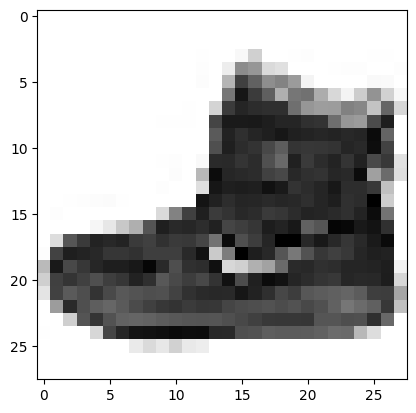

In [ ]:
# Image visualization
plt.imshow(X_train[0], cmap='Greys')

In [15]:
# Identificando os labels
y_train.max()
y_train.min()
total_labels = 10

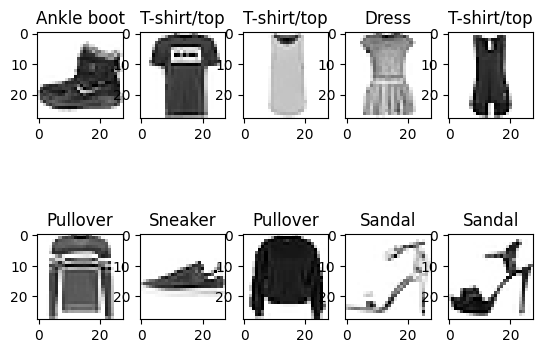

In [23]:
# Analisando documentacao do fashion mnist, foi possivel descobrir o que significa cada label.
"""" 
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for image in range(total_labels):
    plt.subplot(2,5,image+1)
    plt.imshow(X_train[image], cmap='Greys')
    plt.title(label_names[y_train[image]])

O modelo é uma sequencia de entrada, processamento e saída.. Sendo assim, o ideal é, literalmente, levar essa logica para o código.